In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
import nltk
from nltk.corpus import stopwords

from nltk import word_tokenize
import inflect

import gensim
from gensim import corpora

In [3]:
nltk.download('stopwords')
stop_words=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [5]:
import numpy as np

In [6]:
import praw
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [7]:
import networkx as nx

In [8]:
reddit=praw.Reddit(
    client_id="LveMbZqK7omr0BTrNVJtxg",
    client_secret="8lAi0k8XzJ-5te-njkLwSRr2Za7Vgg",
    user_agent="script by u/Maximum-Waltz-5001",
    redirect_uri="https://localhost:8080",
)


In [9]:
def node_adder(g,comment,parent_author):
    
    if comment.author is not None:
#         print (comment.author, "-", parent_author)
        if comment.author not in g.nodes():
            g.add_node(comment.author)

        g.add_edge(comment.author,parent_author)


        for reply in comment.replies.list():
            if isinstance(reply, praw.models.MoreComments):
                continue

            node_adder(g,reply,comment.author)
        
hot_posts=reddit.subreddit('iphone').hot(limit=20)

data=[]
g=nx.Graph()
breadthCommentCount = 10
for post in hot_posts:
    if post.author is not None:
        print (post.author, "-", post.title)
        post.comment_limit = breadthCommentCount

        if post.author not in g.nodes:
            g.add_node(post.author)

        for comment in post.comments.list():
            if isinstance(comment, praw.models.MoreComments):
                continue

            node_adder(g,comment,post.author)
   


AutoModerator - Weekly 'What Should I Buy' and Order/Shipping Thread
binklfoot - I found this in some of my spouse’s stuff, is it an ipod? Do I connect it to my phone and an earpiece to make it work?
IndependenceLong5230 - thank you Apple
igor_bruneli - If you use Google Photos, here's a warning.
MachineExact8506 - What made you want an iPhone?
NJ_Mets_Fan - 15 Pro/Max users - 1 month in, how much do you really use the Action button?
pristinerevenge - From 8GB iPhone 4s to 128GB iPhone 14.
beeclam - Anyone else excited to see the barely-blue iPhone 16 next year?
Leading-Plan - Finally resting my iPhone 6s, upgraded to 15
Pickles-on-ice - How is icloud supposed to work?
ItsBrenOakes - Why did you pick iPhone over Android?
iahebert - Ping my wife's iPhone?
bella-queen7 - Help Needed: Unlocking My At&t iPhone 12 plus for Mint
newyorkcitykid - Loving my Figura Otterbox case
gunksmtn1216 - Dropped my 11 Pro off a second story roof
bullzzye - How do I get the audio message button to go away?

In [80]:
print("No.of Nodes=",len(g.nodes()),"No. of Edges=",len(g.edges()))

No.of Nodes= 149 No. of Edges= 187


In [11]:
nx.density(g)

0.016959912933067294

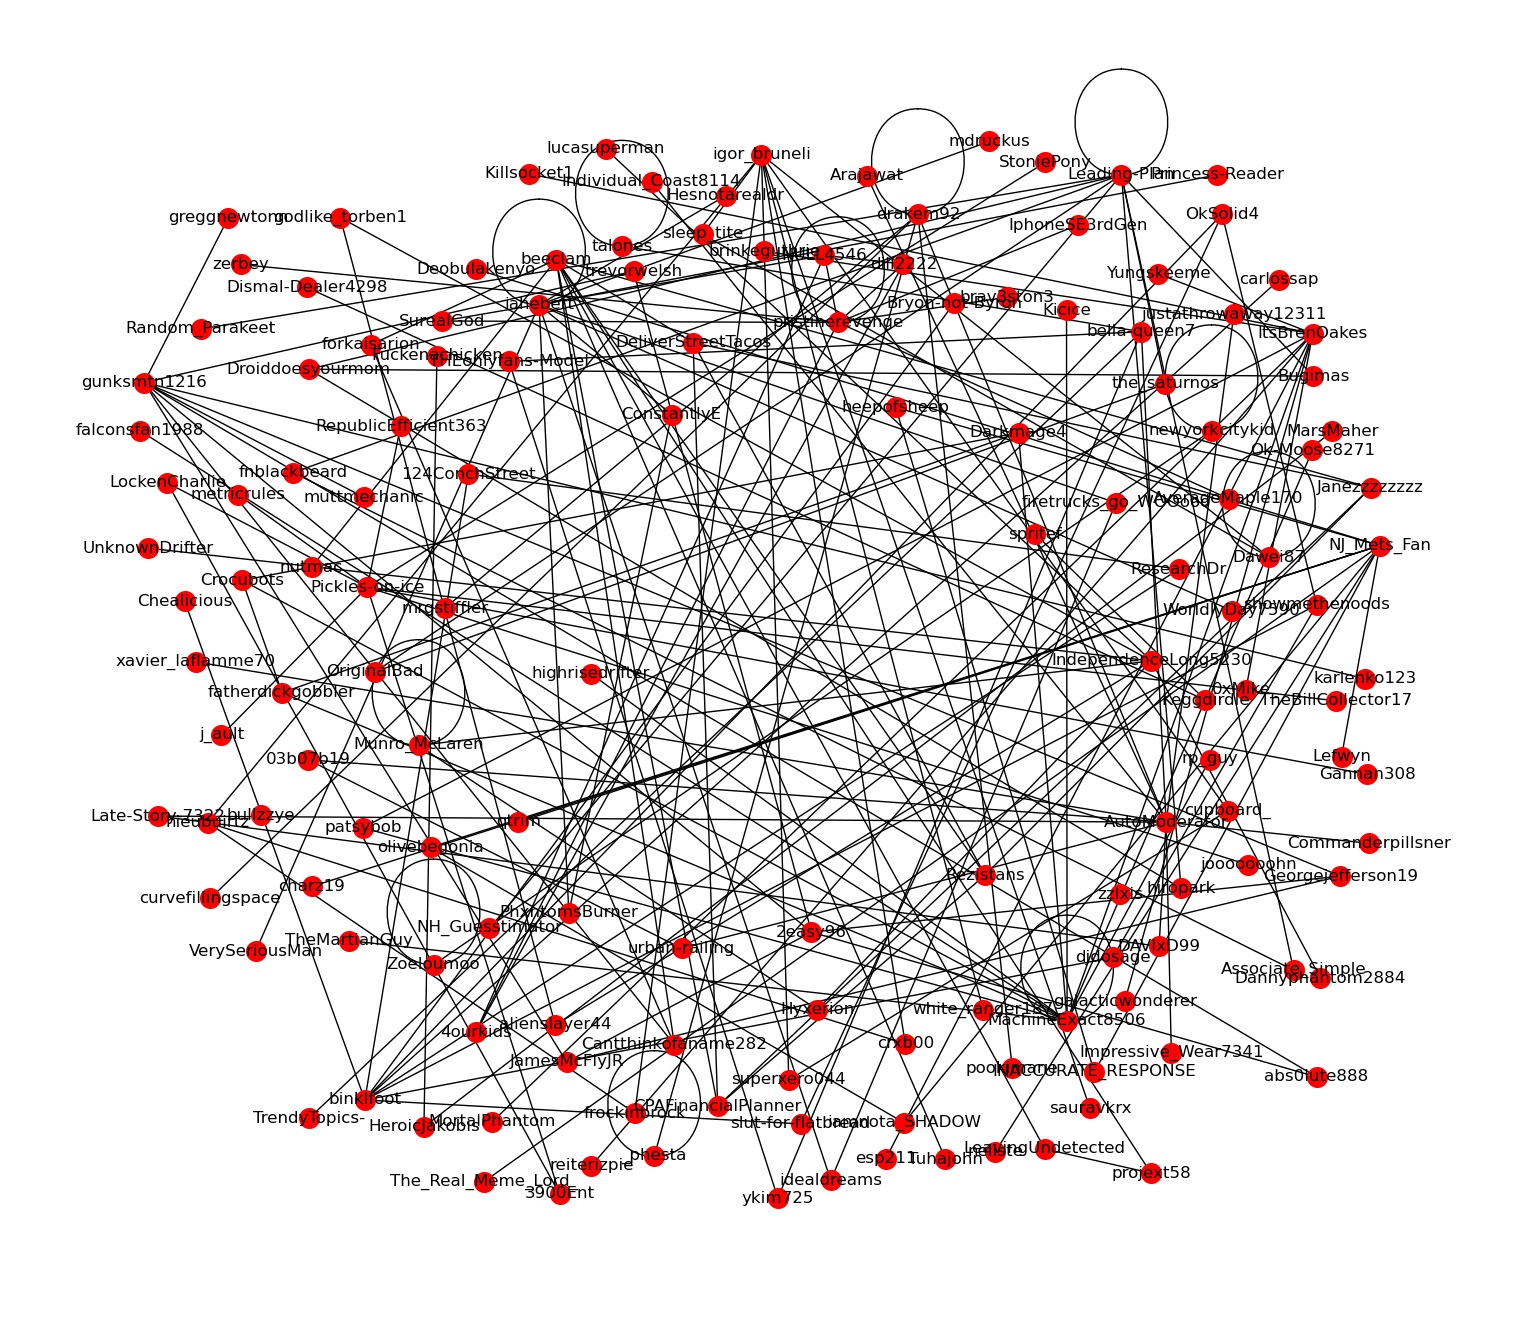

In [336]:

plt.figure(figsize=(15,13))
# Use the Spring layout algorithm
pos = nx.spring_layout(g, scale=10, iterations=5, k=2)
# And draw the graph with node labels
nx.draw(g, pos,node_color='red', with_labels=True, width=1,node_size=200)
plt.show()


In [104]:
degree=pd.DataFrame(nx.degree(g))
degree.sort_values(by=1,ascending=False).style.background_gradient()

,0,1
39,MachineExact8506,13
0,AutoModerator,12
110,iahebert,11
80,Leading-Plan,11
60,pristinerevenge,10
69,beeclam,10
49,NJ_Mets_Fan,10
100,ItsBrenOakes,10
90,Pickles-on-ice,9
29,igor_bruneli,9


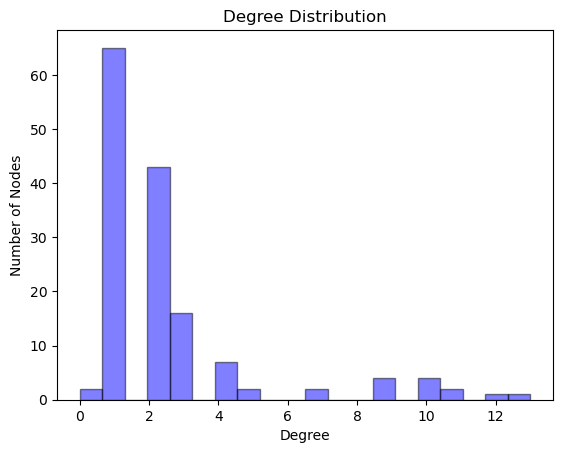

In [90]:
degree_sequence = [d for n, d in nx.degree(g)]

# Plot the degree distribution
plt.hist(degree_sequence, bins=20, alpha=0.5, color='b', edgecolor='k')
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Number of Nodes")
plt.show()

In [105]:
centrality=nx.betweenness_centrality(g)
centrality=[(x,centrality[x]) for x in sorted(centrality,key=centrality.get,reverse=True)]
centrality=pd.DataFrame.from_dict(centrality)
centrality=centrality.rename(columns={0:"Users",1:"Betweenness Centrality"})
centrality.head(5).style.background_gradient()

,Users,Betweenness Centrality
0,AutoModerator,0.015444
1,MachineExact8506,0.011307
2,ItsBrenOakes,0.010664
3,beeclam,0.010020
4,gunksmtn1216,0.009974


In [112]:
data


,Time_Stamps,Upvote Ratio,Author,Score,Number of Comments,Comment,CleanedPosts
0,2023-10-12 02:00:08,0.96,SkylarMLO,21,7,The frosted blue looks better to the naked eye...,frosted blue look better naked eye photo
1,2023-10-12 07:29:50,1.00,vinaylovestotravel,1,1,Some iPhone Models Are Mysteriously Turning Th...,iphone model mysteriously turning night
2,2023-10-11 21:28:23,0.86,Miserable_Impact_431,5,2,Iphone 15,iphone fifteen
4,2023-10-11 23:24:37,1.00,Cr1msonZ,1,0,Dimming,dimming
5,2023-10-11 19:33:16,1.00,Flucky_,2,1,Did Apple fix the wireless charging issue?,apple fix wireless charging issue
...,...,...,...,...,...,...,...
438,2022-12-14 22:00:07,1.00,Admirable_Error_7613,3,2,iPhone 15 Ultras Dynamic Island is Smaller,iphone fifteen ultras dynamic island smaller
439,2022-12-01 04:46:50,1.00,techberg_,3,1,Apple iPhone 15 to come with new Sony's 'State...,apple iphone fifteen come new sonys state art ...
440,2022-05-28 12:11:29,1.00,JCas127,4,1,iPhone 15 may have USBc,iphone fifteen may usbc
441,2021-09-15 16:09:13,1.00,ibralicious,4,0,Apple unveils iPhone 13 and 13 mini!,apple unveils iphone thirteen thirteen mini


In [106]:
cl_centrality=nx.closeness_centrality(g)
cl_centrality=[(x,cl_centrality[x]) for x in sorted(cl_centrality,key=cl_centrality.get,reverse=True)]

cl_centrality=pd.DataFrame.from_dict(cl_centrality)
cl_centrality=cl_centrality.rename(columns={0:"Users",1:"Closeness Centrality"})
cl_centrality.head(5).style.background_gradient()

,Users,Closeness Centrality
0,AutoModerator,0.096525
1,MachineExact8506,0.090340
2,ItsBrenOakes,0.087114
3,Cantthinkofaname282,0.069691
4,bella-queen7,0.069300


In [109]:
eg_centrality=nx.eigenvector_centrality_numpy(g, weight=None, max_iter=50, tol=0)
eg_centrality=[(x,eg_centrality[x]) for x in sorted(eg_centrality,key=eg_centrality.get,reverse=True)]
eg_centrality=pd.DataFrame.from_dict(eg_centrality)
eg_centrality=eg_centrality.rename(columns={0:"Users",1:"Eigenvector Centrality"})
eg_centrality.head(5).style.background_gradient()

,Users,Eigenvector Centrality
0,beeclam,0.534104
1,Janezzzzzzzz,0.369675
2,CPAFinancialPlanner,0.369675
3,DeliverStreetTacos,0.369675
4,Rezistans,0.369675


Text(0.5, 1.0, 'Eigenvector Centrality')

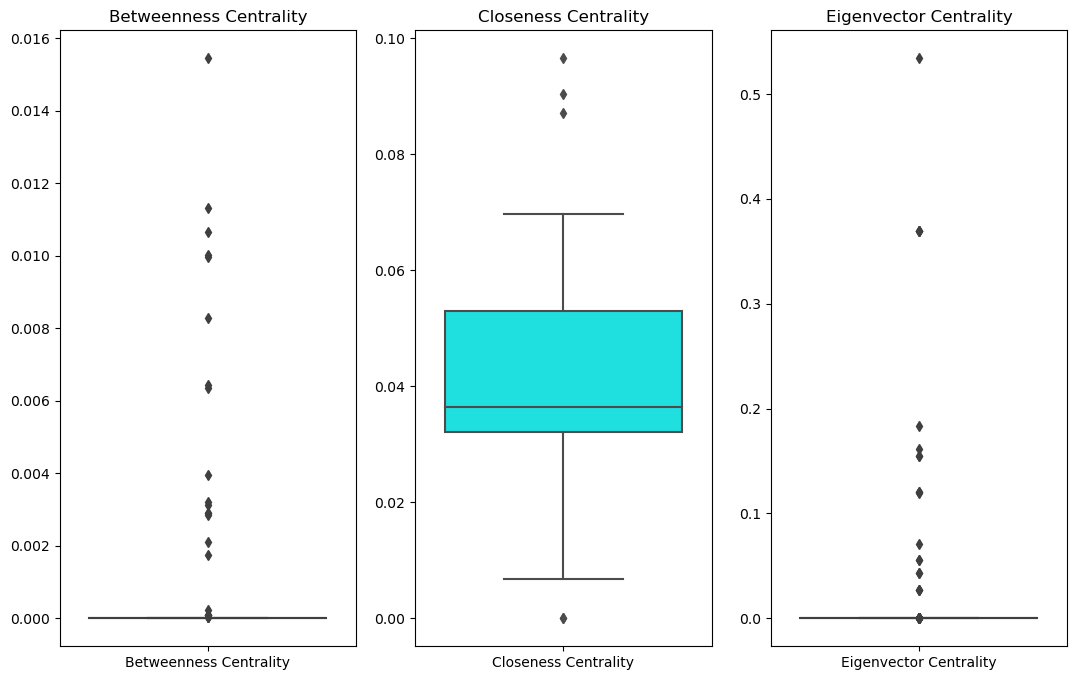

In [110]:
plt.figure(figsize=(13,8))
plt.subplot(1,3,1)
sns.boxplot(centrality)
plt.title("Betweenness Centrality")

plt.subplot(1,3,2)
sns.boxplot(cl_centrality,color="cyan")
plt.title("Closeness Centrality")

plt.subplot(1,3,3)
sns.boxplot(eg_centrality)
plt.title("Eigenvector Centrality")

In [309]:
data=pd.read_csv("data1.csv")
data.style.background_gradient(cmap='YlOrRd')

,Time_Stamps,Upvote Ratio,Author,Score,Number of Comments,Comment
0,2023-10-12 02:00:08,0.960000,SkylarMLO,21,7,The frosted blue looks better to the naked eye than in the photos
1,2023-10-12 07:29:50,1.000000,vinaylovestotravel,1,1,Some iPhone Models Are Mysteriously Turning Themselves Off At Night
2,2023-10-11 21:28:23,0.860000,Miserable_Impact_431,5,2,Iphone 15
3,2023-10-11 00:51:24,0.900000,nan,127,94,Update: Thanks for affirming my regrets! Returned the yellow and bought the blue.
4,2023-10-11 23:24:37,1.000000,Cr1msonZ,1,0,Dimming
5,2023-10-11 19:33:16,1.000000,Flucky_,2,1,Did Apple fix the wireless charging issue?
6,2023-10-11 18:55:24,1.000000,sticky__toffee,2,1,I know nothing go about software development but a question on the side notch/silent button.
7,2023-10-11 11:55:06,0.840000,alex9005,4,14,How much storage did you go for on your iPhone 15/15 Plus ?
8,2023-10-11 18:13:32,0.500000,BigBrandyy,0,11,What wall adaptor should I use with the stock iPhone 15 plus box USB C cable??
9,2023-10-10 21:02:17,1.000000,rollmefurtherbtch,40,14,Night sky shots with a tripod


In [310]:
data=data.dropna()

In [311]:
# regex to replace all numerics
replace_numerics = re.compile(r'\d+',re.IGNORECASE)

# Loading NLTK stop words
stop_words = nltk.corpus.stopwords.words('english')
print ("NLTK stopword list length: ",len(stop_words),'words')


def remove_punctuation(words):
    """ used to remove punctuation"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def replace_numbers(words):
    """used to replace all interger occurrences in list"""
    p = inflect.engine()
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = p.number_to_words(word)
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words

def remove_stopwords(words):
    new_words = []
    for word in words:
        if word not in stop_words:
           
            new_words.append(word)
    return new_words

def normalize(words):
    words = remove_punctuation(words)
    words = replace_numbers(words)
    words = remove_stopwords(words)
    return words

NLTK stopword list length:  179 words


In [312]:
def clean_txt(text,perform_lemm=True):
#     print(text)
    text=re.sub(r'@[aA-zZ0-9]+','',text)
    text=re.sub(r'https?:\/\/\S+','',text)
    text=re.sub(r'@\s','',text)
    text=re.sub(r'(\:)|(\;)|(\.)|(\!)|(\#)|(\^)|(\*)|(\()|(\))|(\,)|(\&)|(\[)|(\])|(\?)|(\+)|(\-)|(\")','',text)
    text=re.sub(r'(\n)','',text)
    
    
    textlist = text.lower().split()
    
    textlist = normalize(textlist)
    text = ' '.join(textlist)
    
    if perform_lemm:
        wnl = WordNetLemmatizer()
        textlist=text.split()
        lemmatized_words=[wnl.lemmatize(wrds) for wrds in textlist]
        
        text=' '.join(lemmatized_words)
    return text

def emoji_removal(text):
     emojiPattern=re.compile("["
     u"\U0001F600-\U0001F64F" # emoticons
     u"\U0001F300-\U0001F5FF" # symbols & pictographs
     u"\U0001F680-\U0001F6FF" # transport & map symbols
     u"\U0001F1E0-\U0001F1FF" # flags (iOS)
     u"\U00002500-\U00002BEF" # chinese char
     u"\U00002702-\U000027B0"
     u"\U00002702-\U000027B0"
     u"\U000024C2-\U0001F251"
     u"\U0001f926-\U0001f937"
     u"\U00010000-\U0010ffff"
     u"\u2640-\u2642"
     u"\u2600-\u2B55"
     u"\u200d"
     u"\u23cf"
     u"\u23e9"
     u"\u231a"
     u"\ufe0f" # dingbats
     u"\u3030""]+", 
     flags=re.UNICODE)
     return emojiPattern.sub(r'',text)

In [313]:
cleanedPosts=[]
for post in data["Comment"]:
    cleanedPost=clean_txt(post)
    removeEmoji=emoji_removal(cleanedPost)
    cleanedPosts.append(removeEmoji)

In [314]:
data["CleanedPosts"]=cleanedPosts

C:\Users\Dell\AppData\Local\Temp\ipykernel_27568\649474660.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["CleanedPosts"]=cleanedPosts


In [315]:
data

,Time_Stamps,Upvote Ratio,Author,Score,Number of Comments,Comment,CleanedPosts
0,2023-10-12 02:00:08,0.96,SkylarMLO,21,7,The frosted blue looks better to the naked eye...,frosted blue look better naked eye photo
1,2023-10-12 07:29:50,1.00,vinaylovestotravel,1,1,Some iPhone Models Are Mysteriously Turning Th...,iphone model mysteriously turning night
2,2023-10-11 21:28:23,0.86,Miserable_Impact_431,5,2,Iphone 15,iphone fifteen
4,2023-10-11 23:24:37,1.00,Cr1msonZ,1,0,Dimming,dimming
5,2023-10-11 19:33:16,1.00,Flucky_,2,1,Did Apple fix the wireless charging issue?,apple fix wireless charging issue
...,...,...,...,...,...,...,...
438,2022-12-14 22:00:07,1.00,Admirable_Error_7613,3,2,iPhone 15 Ultras Dynamic Island is Smaller,iphone fifteen ultras dynamic island smaller
439,2022-12-01 04:46:50,1.00,techberg_,3,1,Apple iPhone 15 to come with new Sony's 'State...,apple iphone fifteen come new sonys state art ...
440,2022-05-28 12:11:29,1.00,JCas127,4,1,iPhone 15 may have USBc,iphone fifteen may usbc
441,2021-09-15 16:09:13,1.00,ibralicious,4,0,Apple unveils iPhone 13 and 13 mini!,apple unveils iphone thirteen thirteen mini


In [316]:
sorted_df=data.sort_values("Upvote Ratio",ascending=False).head(250)
sorted_df[["Author","Upvote Ratio","Score","Number of Comments"]].head(10)

,Author,Upvote Ratio,Score,Number of Comments
442,ibralicious,1.0,4,13
142,deanpsn,1.0,1,0
132,goro-n,1.0,3,2
305,Lodingi,1.0,2,1
134,sereza1,1.0,2,10
135,Allinhalf,1.0,2,0
302,FunAddOne,1.0,4,4
137,can_wrap,1.0,2,1
138,USTody,1.0,6,13
139,crnigorac,1.0,2,7


(array([0.86, 0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  , 1.02]),
 [Text(0.86, 0, '0.86'),
  Text(0.88, 0, '0.88'),
  Text(0.9, 0, '0.90'),
  Text(0.9199999999999999, 0, '0.92'),
  Text(0.94, 0, '0.94'),
  Text(0.96, 0, '0.96'),
  Text(0.98, 0, '0.98'),
  Text(1.0, 0, '1.00'),
  Text(1.02, 0, '1.02')])

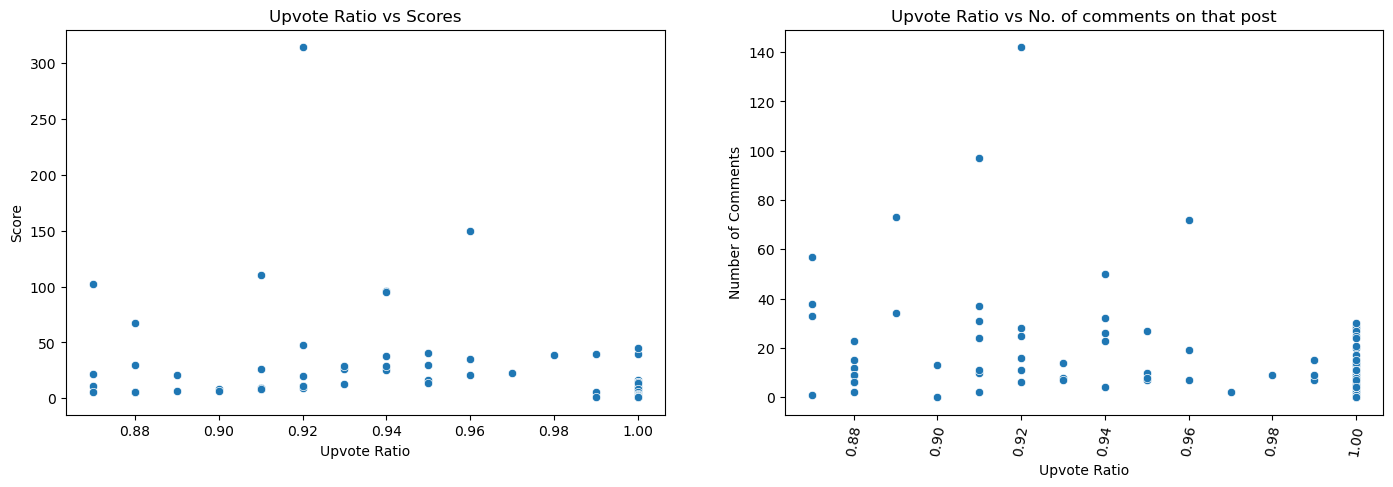

In [317]:

plt.figure(figsize=(17,5))

plt.subplot(1,2,1)
plt.title("Upvote Ratio vs Scores")
sns.scatterplot(x="Upvote Ratio",y="Score",data=sorted_df)


plt.subplot(1,2,2)
plt.title("Upvote Ratio vs No. of comments on that post")
sns.scatterplot(x="Upvote Ratio",y="Number of Comments",data=sorted_df)
plt.xticks(rotation=80)


<Axes: xlabel='Number of Comments', ylabel='Count'>

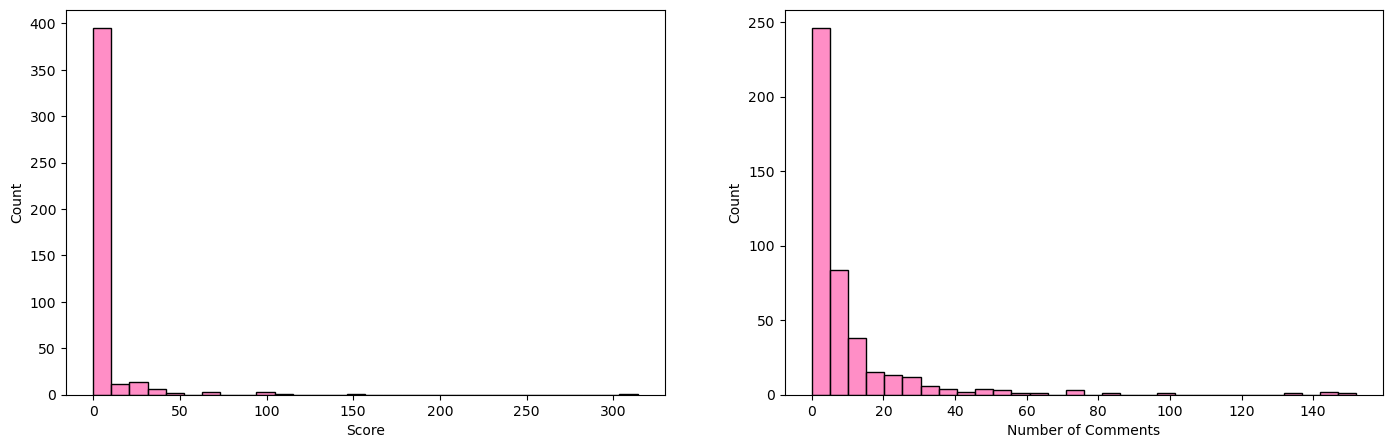

In [334]:
plt.figure(figsize=(17,5))
plt.subplot(1,2,1)
sns.histplot(data["Score"], bins=30, kde=False, color='hotpink')

plt.subplot(1,2,2)
sns.histplot(data["Number of Comments"], bins=30, kde=False, color='hotpink')

In [318]:
nltk.download('punkt')
 

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [319]:
sorted_df

,Time_Stamps,Upvote Ratio,Author,Score,Number of Comments,Comment,CleanedPosts
442,2021-07-20 22:16:01,1.00,ibralicious,4,13,r/iphone15 Lounge,riphone15 lounge
142,2023-09-30 20:47:40,1.00,deanpsn,1,0,PITAKA Remix Case Concept,pitaka remix case concept
132,2023-09-30 21:02:45,1.00,goro-n,3,2,"Apple iPhone 15, iPhone 15 Overheating Exclusi...",apple iphone fifteen iphone fifteen overheatin...
305,2023-09-22 12:15:48,1.00,Lodingi,2,1,Phone pickup questions,phone pickup question
134,2023-09-30 23:02:02,1.00,sereza1,2,10,anyone who has the 14p and either the 15 or 15...,anyone 14p either fifteen 15p please help
...,...,...,...,...,...,...,...
236,2023-09-24 15:25:13,0.88,T_Briggs,67,15,His and hers,
269,2023-09-23 19:14:47,0.87,MrHorns7,11,1,Captured on iPhone 15,captured iphone fifteen
242,2023-09-25 01:41:49,0.87,Maverett,6,33,Buyer’s Remorse for Colour?,buyer remorse colour
15,2023-10-10 14:32:16,0.87,alex9005,102,38,This is one good looking phone,one good looking phone


In [349]:
from nltk.util import bigrams
from nltk import word_tokenize



bigrams_lst=[]


for post in sorted_df["CleanedPosts"]:
    tokenized=word_tokenize(post)
    pairs=list(bigrams(tokenized))
    
  
       
    for p in pairs:
            bigrams_lst.append(p)
            
    

In [350]:
import collections
bicounts=collections.Counter(bigrams_lst)


In [351]:
sorted_df

,Time_Stamps,Upvote Ratio,Author,Score,Number of Comments,Comment,CleanedPosts
442,2021-07-20 22:16:01,1.00,ibralicious,4,13,r/iphone15 Lounge,riphone15 lounge
142,2023-09-30 20:47:40,1.00,deanpsn,1,0,PITAKA Remix Case Concept,pitaka remix case concept
132,2023-09-30 21:02:45,1.00,goro-n,3,2,"Apple iPhone 15, iPhone 15 Overheating Exclusi...",apple iphone fifteen iphone fifteen overheatin...
305,2023-09-22 12:15:48,1.00,Lodingi,2,1,Phone pickup questions,phone pickup question
134,2023-09-30 23:02:02,1.00,sereza1,2,10,anyone who has the 14p and either the 15 or 15...,anyone 14p either fifteen 15p please help
...,...,...,...,...,...,...,...
236,2023-09-24 15:25:13,0.88,T_Briggs,67,15,His and hers,
269,2023-09-23 19:14:47,0.87,MrHorns7,11,1,Captured on iPhone 15,captured iphone fifteen
242,2023-09-25 01:41:49,0.87,Maverett,6,33,Buyer’s Remorse for Colour?,buyer remorse colour
15,2023-10-10 14:32:16,0.87,alex9005,102,38,This is one good looking phone,one good looking phone


In [352]:
bigrams=pd.DataFrame(bicounts.most_common(100),
                             columns=['bigram', 'count'])


In [353]:
bigrams = bigrams.set_index('bigram').T.to_dict('records')

In [355]:
g2=nx.Graph()
for k, v in bigrams[0].items():
    g2.add_edge(k[0], k[1], weight=(v))

In [356]:
from networkx.algorithms import community

# Detect communities using the Louvain algorithm

from community import community_louvain
communities =community_louvain.best_partition(g2)


In [357]:
print("Total No. of communities",len(communities) )


Total No. of communities 97


In [358]:
colors = [communities[n] for n in g2.nodes]



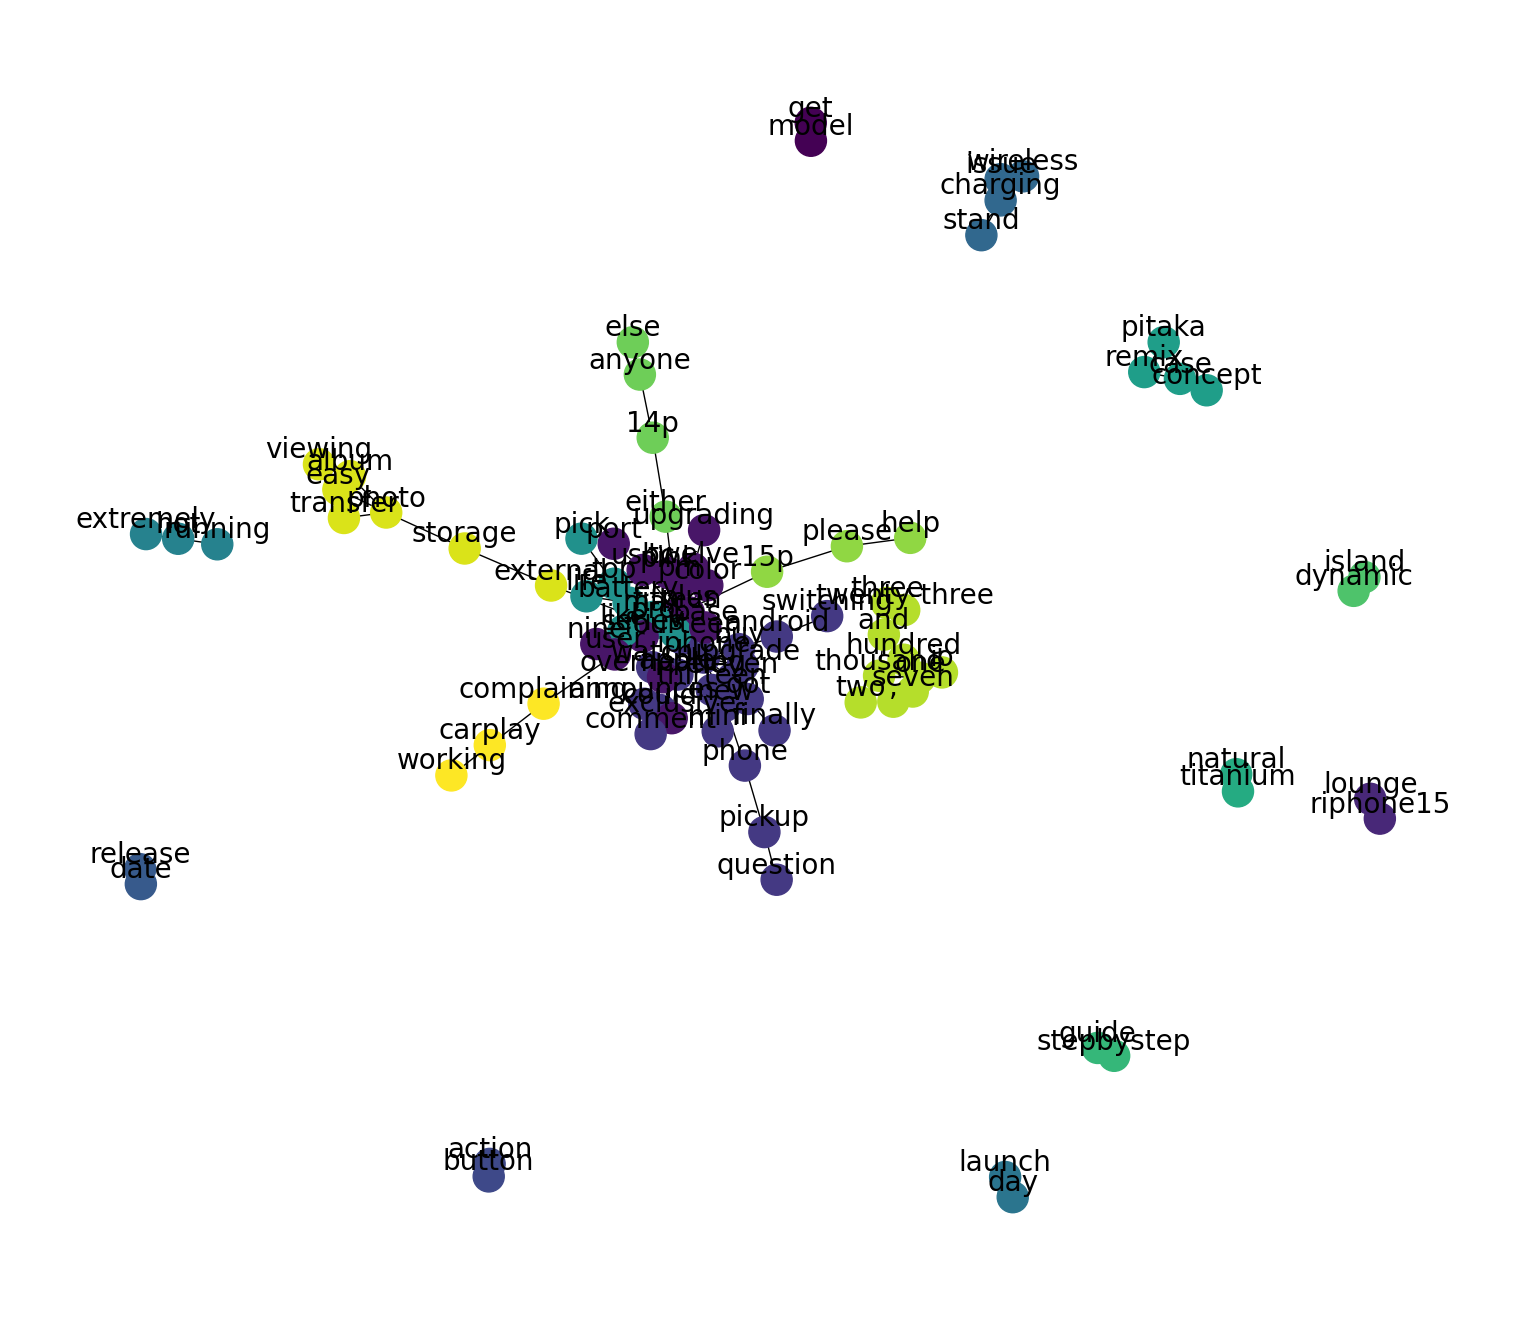

In [359]:
plt.figure(figsize=(15,13))



# Draw the graph with nodes color-coded by community
nx.draw_spring(g2, node_color=colors,with_labels=True,node_size=500,font_size=20,verticalalignment
="bottom")

plt.show()



In [325]:
len(data)

438

In [326]:
data

,Time_Stamps,Upvote Ratio,Author,Score,Number of Comments,Comment,CleanedPosts
0,2023-10-12 02:00:08,0.96,SkylarMLO,21,7,The frosted blue looks better to the naked eye...,frosted blue look better naked eye photo
1,2023-10-12 07:29:50,1.00,vinaylovestotravel,1,1,Some iPhone Models Are Mysteriously Turning Th...,iphone model mysteriously turning night
2,2023-10-11 21:28:23,0.86,Miserable_Impact_431,5,2,Iphone 15,iphone fifteen
4,2023-10-11 23:24:37,1.00,Cr1msonZ,1,0,Dimming,dimming
5,2023-10-11 19:33:16,1.00,Flucky_,2,1,Did Apple fix the wireless charging issue?,apple fix wireless charging issue
...,...,...,...,...,...,...,...
438,2022-12-14 22:00:07,1.00,Admirable_Error_7613,3,2,iPhone 15 Ultras Dynamic Island is Smaller,iphone fifteen ultras dynamic island smaller
439,2022-12-01 04:46:50,1.00,techberg_,3,1,Apple iPhone 15 to come with new Sony's 'State...,apple iphone fifteen come new sonys state art ...
440,2022-05-28 12:11:29,1.00,JCas127,4,1,iPhone 15 may have USBc,iphone fifteen may usbc
441,2021-09-15 16:09:13,1.00,ibralicious,4,0,Apple unveils iPhone 13 and 13 mini!,apple unveils iphone thirteen thirteen mini


In [327]:
# Downloading the vader lexicon for sentiment analysis
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# Initializing the SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()




# Applying VADER sentiment analysis
data['Sentiment_Scores'] = data['CleanedPosts'].apply(lambda x: sid.polarity_scores(x))
data['Compound_Score'] = data['Sentiment_Scores'].apply(lambda score_dict: score_dict['compound'])



[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
C:\Users\Dell\AppData\Local\Temp\ipykernel_27568\1529723416.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sentiment_Scores'] = data['CleanedPosts'].apply(lambda x: sid.polarity_scores(x))
C:\Users\Dell\AppData\Local\Temp\ipykernel_27568\1529723416.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Compound_Score'] = data['

C:\Users\Dell\AppData\Local\Temp\ipykernel_27568\1667990631.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sentiment_Category'] = data['Compound_Score'].apply(assign_sentiment_category)


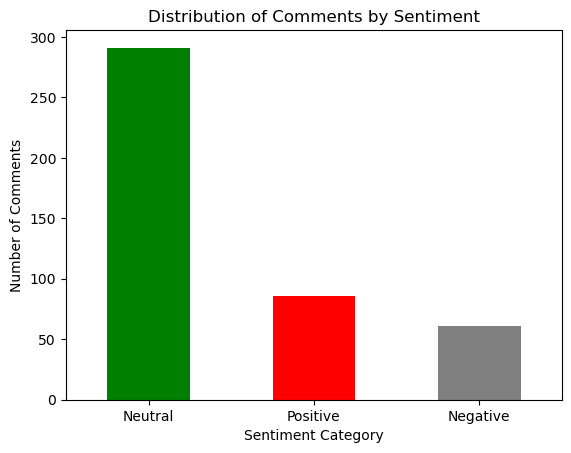

In [328]:
def assign_sentiment_category(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

data['Sentiment_Category'] = data['Compound_Score'].apply(assign_sentiment_category)

# Group by the Sentiment_Category and get the size of each group
sentiment_counts = data['Sentiment_Category'].value_counts()

# Plotting
sentiment_counts.plot(kind='bar', color=['green', 'red', 'grey'])
plt.xlabel('Sentiment Category')
plt.ylabel('Number of Comments')
plt.title('Distribution of Comments by Sentiment')
plt.xticks(rotation=0)
plt.show()

In [329]:
data['Timestamp'] = pd.to_datetime(data['Time_Stamps'])

C:\Users\Dell\AppData\Local\Temp\ipykernel_27568\2494767370.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Timestamp'] = pd.to_datetime(data['Time_Stamps'])


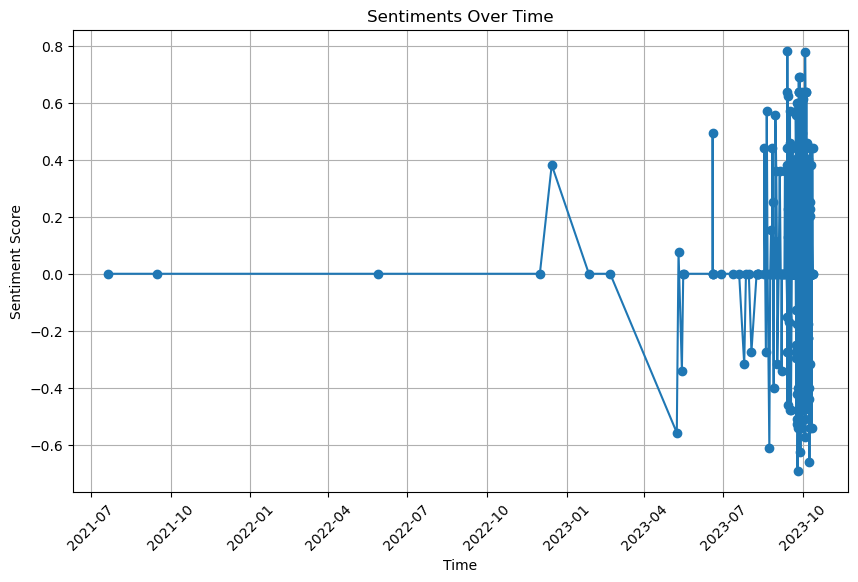

In [330]:
plt.figure(figsize=(10, 6))
plt.plot(data['Timestamp'], data['Compound_Score'], marker='o', linestyle='-')
plt.title('Sentiments Over Time')
plt.xlabel('Time')
plt.ylabel('Sentiment Score')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()
